In [51]:
import pickle
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation


# Only need to do once 
# nltk.download()

In [52]:
# customer_service = pickle.load(open( "customer_service_posts.pkl", "rb" ))
# customer_service['label'] = 'customer_service'
chef = pickle.load(open( "chef_posts.pkl", "rb" ))
chef['label'] = 'chef'
data_scientist = pickle.load(open( "data_scientist_posts.pkl", "rb" ))
data_scientist['label'] = 'data_scientist'

df = data_scientist.append(chef)#.append(customer_service)

pickle.dump(df, open( "various_industry_posts.pkl", "wb" ) )

/Users/user/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [53]:
df

,0,1,2,3,4,5,6,7,8,9,10,label,11
0,3.7,Data Scientist,Scotts Miracle-Gro,"Columbus, OH",$89k-$132k(Glassdoor Est.),Today,C3 meets an urgent and fast-growing demand for...,Driving adoption of Deep Learning systems into...,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,4.9,Data Scientist,C3,"Redwood City, CA",$146k-$200k(Glassdoor Est.),Today,-,-,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,3.0,"Scientist, Lab",West Pharmaceutical Services,"Exton, PA",,We're Hiring,"Scientist, Lab\n\nExton\n\nPennsylvania\n\nWes...",Perform analysis using various techniques incl...,"Overview\nHeadquartersExton, PA\nSize5001 to 1...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,3.9,Data Scientist,Mission Bell Manufacturing,"Morgan Hill, CA",,New,Mission Bell is the premiere destination for a...,Competitive pay\nRich benefits package\nA grow...,"Overview\nHeadquartersMorgan Hill, CA\nSize51 ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,4.1,Data Analyst,The Motley Fool,"Alexandria, VA",$71k-$97k(Glassdoor Est.),New,Data Analyst\n\nAre you excited to use data to...,Consider yourself a scientist: Whether you hav...,"Overview\nHeadquartersAlexandria, VA\nSize201 ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,,Senior Data Analyst,qualifIQ,"New York, NY",$150k-$200k(Employer Est.),We're Hiring,"About Teachers Pay Teachers\nOur client, Teach...",Use data to tell a story. Surface insights and...,"Overview\nHeadquartersNew York, NY\nSize1 to 5...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,3.0,Data Scientist - Computer Science,comScore,"Madison, WI",$69k-$99k(Glassdoor Est.),We're Hiring,Job Description\n\nJob Title: Data Scientist\n...,"Design and implement statistical, optimization...","Overview\nHeadquartersReston, VA\nSize1001 to ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,3.8,Data Analyst,University of Texas Southwestern Medical Center,"Dallas, TX",$50k-$60k(Employer Est.),We're Hiring,Experience and education:\nEITHER\nMaster's de...,EITHER\nMaster's degree in field such as Biost...,"Overview\nHeadquartersDallas, TX\nSize10000+ E...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,4.0,Data Analyst / Database Developer,Advanced Digital Data,"Warwick, RI",,New,ADD Systems’ industry-leading Business Intelli...,Document reporting requirements and create des...,"Overview\nHeadquartersFlanders, NJ\nSize51 to ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN
0,3.1,Data Scientist,Integral Ad Science,"New York, NY",$129k-$188k(Glassdoor Est.),Today,We are seeking a Data Scientist to join our te...,Work on challenging fundamental data science p...,"Overview\nHeadquartersNew York, NY\nSize501 to...",https://www.glassdoor.com/partner/jobListing.h...,NaN,data_scientist,NaN


In [54]:
df = pickle.load( open( "various_industry_posts.pkl", "rb" ) )
df.columns = ['Rating', 'Job_title', 'Company', 'Location', 'Salary_range', 'Status', 'Job_description', 'Job_description_bullets', 'Company_info', 'Link', 'Other', 'label', 'Other2'] 
#drop last column
df=df[['Rating', 'Job_title', 'Company', 'Location', 'Salary_range', 'Status', 'Job_description', 'Job_description_bullets', 'Company_info', 'Link', 'label']]

df.reset_index(drop = True, inplace = True)
print(df.shape)

df.drop_duplicates(inplace=True)
print(df.shape)

df

(1724, 11)
(1722, 11)


,Rating,Job_title,Company,Location,Salary_range,Status,Job_description,Job_description_bullets,Company_info,Link,label
0,3.7,Data Scientist,Scotts Miracle-Gro,"Columbus, OH",$89k-$132k(Glassdoor Est.),Today,C3 meets an urgent and fast-growing demand for...,Driving adoption of Deep Learning systems into...,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
1,4.9,Data Scientist,C3,"Redwood City, CA",$146k-$200k(Glassdoor Est.),Today,-,-,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
2,3.0,"Scientist, Lab",West Pharmaceutical Services,"Exton, PA",,We're Hiring,"Scientist, Lab\n\nExton\n\nPennsylvania\n\nWes...",Perform analysis using various techniques incl...,"Overview\nHeadquartersExton, PA\nSize5001 to 1...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
3,3.9,Data Scientist,Mission Bell Manufacturing,"Morgan Hill, CA",,New,Mission Bell is the premiere destination for a...,Competitive pay\nRich benefits package\nA grow...,"Overview\nHeadquartersMorgan Hill, CA\nSize51 ...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
4,4.1,Data Analyst,The Motley Fool,"Alexandria, VA",$71k-$97k(Glassdoor Est.),New,Data Analyst\n\nAre you excited to use data to...,Consider yourself a scientist: Whether you hav...,"Overview\nHeadquartersAlexandria, VA\nSize201 ...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
5,,Senior Data Analyst,qualifIQ,"New York, NY",$150k-$200k(Employer Est.),We're Hiring,"About Teachers Pay Teachers\nOur client, Teach...",Use data to tell a story. Surface insights and...,"Overview\nHeadquartersNew York, NY\nSize1 to 5...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
6,3.0,Data Scientist - Computer Science,comScore,"Madison, WI",$69k-$99k(Glassdoor Est.),We're Hiring,Job Description\n\nJob Title: Data Scientist\n...,"Design and implement statistical, optimization...","Overview\nHeadquartersReston, VA\nSize1001 to ...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
7,3.8,Data Analyst,University of Texas Southwestern Medical Center,"Dallas, TX",$50k-$60k(Employer Est.),We're Hiring,Experience and education:\nEITHER\nMaster's de...,EITHER\nMaster's degree in field such as Biost...,"Overview\nHeadquartersDallas, TX\nSize10000+ E...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
8,4.0,Data Analyst / Database Developer,Advanced Digital Data,"Warwick, RI",,New,ADD Systems’ industry-leading Business Intelli...,Document reporting requirements and create des...,"Overview\nHeadquartersFlanders, NJ\nSize51 to ...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist
9,3.1,Data Scientist,Integral Ad Science,"New York, NY",$129k-$188k(Glassdoor Est.),Today,We are seeking a Data Scientist to join our te...,Work on challenging fundamental data science p...,"Overview\nHeadquartersNew York, NY\nSize501 to...",https://www.glassdoor.com/partner/jobListing.h...,data_scientist


In [31]:
# job_descriptions = df['Job_description']#.dropna()

In [32]:
# vocab = np.array(cv.get_feature_names())
# counts = np.array(tf.sum(0))[0,:]
# vocab[np.argsort(-counts)[:100]]

## K Means to group into sub categories

In [55]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
cv = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    binary=False, 
    token_pattern = "\\b[a-z][a-z]+\\b",
#     max_df = 0.5, # throws out too often (50% of docs)
    min_df = 5, # throws out too infreq
    ngram_range=(1,2),
)

In [57]:
n_components = 10
beta = 0.005
iterations = 20

lda = LatentDirichletAllocation(learning_method = 'online',
                                n_components = n_components,
                                n_jobs = -1,
                                topic_word_prior = beta,
                                max_iter = iterations,
                                learning_decay = 0.7
                               )

In [58]:
X_train, X_test,y_train,y_test =  train_test_split(df[['Rating', 'Job_title', 'Company', 'Location', 'Salary_range', 'Status', 'Job_description', 'Job_description_bullets', 'Company_info', 'Link']],df[['label']],test_size=0.20,random_state=70, stratify=df[['label']])
# print(k_means.labels_[:])
# print(y_train[:])


# print('Accuracy:{0:f}'.format(score))

In [59]:
cv.fit(X_train['Job_description'])
X_cv_train = pd.DataFrame(cv.transform(X_train['Job_description']).toarray(), columns=cv.get_feature_names())

In [39]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(np.array(cv.get_feature_names())[j])
    print()

TOPIC 0
ability
support
work
laboratory
skills
experience
clients
ascent
knowledge
environment

TOPIC 1
application
position
education
experience
required
information
documents
apply
federal
service

TOPIC 2
food
chef
kitchen
work
experience
culinary
team
service
job
ability

TOPIC 3
data
experience
work
business
team
skills
development
science
research
analysis

TOPIC 4
data
experience
pfizer
tools
support
provide
lead
employment
process
working

TOPIC 5
food
team
service
chef
hilton
hospitality
quality
job
standards
culinary

TOPIC 6
et
la
des
en
les
le
du
vous
today
au

TOPIC 7
experience
team
data
cell
analytical
learning
machine
advertising
machine learning
time

TOPIC 8
laboratory
food
procedures
employees
marriott
quality
ensures
standards
testing
results

TOPIC 9
culinary
food
compass
experience
company
associates
catering
chef
compass group
group



In [60]:
lda.fit(X_cv_train)
X_cv_lda_train = lda.transform(X_cv_train)

In [63]:
X_cv_train.shape

(1377, 16793)

In [40]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters, random_state=10) # n_init, # of times the K-mean algorithm will run
km.fit(X_cv_lda_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [41]:
intermediate = pd.DataFrame(y_train[:]).reset_index(drop=True)

In [42]:
df_output=pd.DataFrame()
df_output['predicted']=km.labels_[:]
df_output = df_output.join(intermediate)
df_output

,predicted,label
0,1,chef
1,0,data_scientist
2,1,chef
3,1,chef
4,0,data_scientist
5,1,chef
6,0,data_scientist
7,1,chef
8,1,chef
9,1,chef


In [43]:
sum(df_output[df_output['label']=="chef"]['predicted'])

677

In [44]:
df_output[df_output['label']=="chef"].shape

(682, 2)

In [45]:
sum(df_output[df_output['label']=="data_scientist"]['predicted'])

62

In [46]:
df_output[df_output['label']=="data_scientist"].shape

(695, 2)

In [187]:
accuracy_score = 1-(175/1377)
accuracy_score # 50 topics

0.8729121278140886

In [202]:
accuracy_score = 1-((6/1377) + ((695-611)/1377))
accuracy_score # 10 topics

0.934640522875817

In [47]:
accuracy_score = 1-((62/1377) + ((682-677)/1377))
accuracy_score # 10 topics

0.9513435003631082

In [48]:
(682-677)

5

In [206]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20], 'learning_decay': [.5, .7, .9], 'topic_word_prior':[.1,.01,.001]}

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(X_cv_train)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=0.005,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 15, 20], 'learning_decay': [0.5, 0.7, 0.9], 'topic_word_prior': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### LDA WITH skLearn

In [114]:
cv.fit(job_descriptions)
X_cv = pd.DataFrame(cv.transform(job_descriptions).toarray(), columns=cv.get_feature_names())

In [7]:
X_cv

,aa,aa employer,aa pay,aa vet,aaa,aap,ab,abap,abbott,abbott com,...,zeppelin,zero,zillow,zillow group,zillow offers,zillows,zone,zones,zullo,zullo ezullo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
lda.fit(X_cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=30, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=0.005,
             total_samples=1000000.0, verbose=0)

In [10]:
# if time could do a gridsearch to optimize... lda.perplexity(X_cv)

In [12]:
# X_cv_lda is a matrix array where all job posts are represented as a combination of LDA-defined topics

X_cv_lda = lda.transform(X_cv)
X_cv_lda

array([[  1.35501510e-04,   1.35501453e-04,   1.13168294e-01, ...,
          1.35501399e-04,   1.35501554e-04,   1.35501500e-04],
       [  6.66666667e-02,   6.66666667e-02,   6.66666667e-02, ...,
          6.66666667e-02,   6.66666667e-02,   6.66666667e-02],
       [  3.13481837e-02,   1.70503289e-04,   1.70503232e-04, ...,
          1.70503325e-04,   1.70503443e-04,   5.48355726e-01],
       ..., 
       [  2.78425912e-03,   1.15740842e-04,   6.03865124e-02, ...,
          1.15741093e-04,   1.15740923e-04,   1.35780000e-01],
       [  7.63061332e-03,   3.47222367e-04,   3.47222706e-04, ...,
          5.90875385e-03,   3.47222511e-04,   5.21971716e-01],
       [  3.60361062e-04,   2.75820831e-02,   2.98529984e-02, ...,
          3.60360862e-04,   2.81466772e-02,   6.49779490e-02]])

In [49]:
# Add this info on topics to appendix

for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(np.array(cv.get_feature_names())[j])
    print()

TOPIC 0
security
technologies
systems
data center
engineering
students
center
networking
cloud
network

TOPIC 1
learning
machine
machine learning
algorithms
deep learning
deep
ai
computer
performance
optimization

TOPIC 2
google
engineers
usa
engineering
products
learning
product
resumes
scale
machine

TOPIC 3
management
support
analysis
required
job
information
position
analyst
quality
project

TOPIC 4
research
clinical
scientific
scientist
laboratory
medical
biology
cell
health
patient

TOPIC 5
software
learning
solutions
product
design
machine
engineering
machine learning
technical
tools

TOPIC 6
application
position
education
required
information
apply
documents
resume
employment
service

TOPIC 7
status
employment
gender
disability
national
race
national origin
religion
origin
color

TOPIC 8
people
ntt
ntt data
analytics
clients
deloitte
services
learn
data services
analysis

TOPIC 9
vision
technology
employee
clients
company
machine
schwab
learning
medical
hire

TOPIC 10
learning


Create a formula that takes in resume text, applies the transformations of the vectorizer and the lda, and then performs cosine similarity  and gives back df sorted in order of best options

In [13]:
# Needs X_cv_lda to be defined

def cosine_sim(transformed_resume):
    similarities = []
    for job in X_cv_lda:
        cs = cosine_similarity(job.reshape(-1,1).T, transformed_resume.reshape(-1,1).T)
        similarities.append(cs[0][0])
    return similarities

In [14]:
# Needs lda, cv, and df to be defined and pre-fit

def compare_resume_lda(resume_as_txt):
    
    string_resume = str(resume_as_txt)
    list_resume=[]
    list_resume.append(string_resume)
    transformed_resume = lda.transform(cv.transform(list_resume))
    
    similarities_to_my_resume = cosine_sim(transformed_resume)
    
    df_you = df
    df_you['similarity'] = similarities_to_my_resume
    
    return df_you

Create a formula that takes location, company, and ranked df as inputs and gives back recommendation as output

In [15]:
def return_rec(resume_as_text, company="", location=""):
    
    df_ranked = compare_resume_lda(resume_as_txt)
    
    if company == "":
        df_company = df_ranked
    else:
        df_company = df_ranked[df_ranked['Company'].str.contains(company)]

    if location == "":
        df_ranked_filtered = df_company
    else:
        df_ranked_filtered = df_company[df_company['Location'].str.contains(location)]
    
    top_match = df_ranked_filtered.sort_values('similarity', ascending=False).head(1)
    return top_match['Link'].iloc[0]

In [16]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(lda, open('lda.pkl', 'wb'))
pickle.dump(X_cv_lda, open('X_cv_lda.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))

In [16]:
company = ""
location = ""
resume_as_txt = '''Gretta Mae
Ferguson
Data Scientist   |   Product Manager   |   Business Analyst
grettamaeferguson@gmail.com
256-710-3729
Seattle, WA, willing to relocate

Summary
Experienced business analyst and data scientist, motivated to help turn data into insights and insights into action. Has over 5 years of direct professional experience in addition to 5 years building these skills in academia. Is curiosity driven and strategically minded.

Education
Metis Data Science Bootcamp 2018 - 2018
Pomona College 2010 - 2013
Bachelors in Mathematics
Bachelors in Physics
Davidson College 2008 - 2010

Employment
McKinsey and Company
Senior Analyst
Atlanta - New York - Seattle
August 2014 to July 2018
* Collaborated on hypothesis-driven, iterative product development of "Portfolio Navigator", a suite of business intelligence dashboards that help users to segment customers, price products, identify opportunities, and develop business strategy. Grew “Portfolio Navigator” subscription revenue 75% YoY to ~2M in annual revenue.
* Led systems design for multiple projects, establishing data collection processes via SFTP and web scraping as well as designing and optimizing several dozen SQL databases that analyze over 1 billion rows of raw data. Wrote technical business requirements for data engineering team and audited SQL code logic to improve data quality and processing efficiency.
* Managed monthly sprints with team of 6 to deliver monthly product updates. Created multi-year product roadmaps, driving consensus with key business partners across 20+ internal and external teams on data inputs, modeling methodology, and UX design.
* Provided strategic recommendations as management consultant on numerous engagements. Recommended P&L opportunities by analyzing footprint optimization, vendor pricing strategy, product requirements, survey interpretation, B2B negotiation tactics and creative financing. 

Med Plis Inc
Business Analyst
Florence AL
June 2013 - July 2014
* Compiled data from various sources (like patient records, business finances, payroll, etc.) and extracted information to advise management on financial optimization efforts. 
* Drafted the budget for a comprehensive ((radio, print, and online) advertising campaign. 
* Launched Google AdWords and improved search visibility of the company website.

Skills
Algorithms and Statistics
Python (incl. SKLearn, pandas, etc)
R
Database Management
SQL 
NoSQL (MangoDB)
Data Visualization
Tableau
MatPlotLib
AltAir
Rapid web app development
Flask
JavaScript
HTML/CSS

Awards
Author on Peer Reviewed Publication in Polymers Journal
June 2015
Title: Comparative Indoor and Outdoor Degradation of Organic Photovoltaic Cells via Inter-laboratory Collaboration
Winner of Roland R Tileston Memorial Prize in Physics
May 2011
Established in 1952 in honor of physics professor R.R. Tileston, this prize is awarded to an outstanding student in physics whose record in the department is judged most promising.

Volunteering
Puget Sound Programming Python  (PuPPy)
Charity Dinner Gala Chair
Seattle
2018'''

In [18]:
return_rec(resume_as_txt)

'https://www.glassdoor.com/partner/jobListing.htm?pos=1223&ao=4120&s=58&guid=00000167111644a780736d5535b73464&src=GD_JOB_AD&t=SR&extid=1&exst=OL&ist=&ast=OL&vt=w&slr=true&rtp=0&cs=1_9422eb88&cb=1542179931838&jobListingId=2993579195'

In [106]:
(528+213)/1389

0.5334773218142549

In [122]:
accuracy_score = accuracy_score(y_test,km.predict(X_test))

ValueError: could not convert string to float: 'Overview\nHeadquartersWindsor, CA\nSize1001 to 5000 Employees\nFounded1997\nTypeCompany - Private\nIndustryHealth Care Services & Hospitals\nSectorHealth Care\nRevenueUnknown / Non-Applicable\nCompetitorsBrookdale Senior Living, Aegis Living\nVisit Oakmont Management Group Website'

In [14]:
general_skills = ['analysis', 'machine learning', 'statistics', 'computer science', 'communication', 'mathematics', 'math', 'visualization', 'ai', 'deep learning', 'nlp', 'software development', 'neural networks', 'neural network', 'project management', 'software engineer', 'data engineer', 'software engineering', 'data engineering']
tech_skills = ['python', 'sql', 'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive', 'scala', 'aws', 'matlab', 'tensorflow', 'excel', 'nosql', 'linux', 'azure', 'scikit learn', 'spss', 'pig', 'pandas', 'javascript', 'pearl', 'numpy', 'keras', 'git', 'docker', 'mysql', 'hbase', 'cassandra', 'pytorch', 'caffe']
skills = general_skills + tech_skills
print(len(skills)) # had to leave off r, c, mangodb, and d3 because didn't show up in countvectorizer matrix

50


In [13]:
X_cv_skills = X_cv[skills]

In [17]:
def cosine_sim(resume_as_txt):
    
    string_resume = str(resume_as_txt)
    list_resume=[]
    list_resume.append(string_resume)
    resume_cv = cv.transform(list_resume)
    resume_cv[skills]
    
    similarities = []
    for job in X_cv_lda:
        cs = cosine_similarity(job.reshape(-1,1).T, transformed_resume.reshape(-1,1).T)
        similarities.append(cs[0][0])
    return similarities

In [37]:
string_resume = str(resume_as_txt)
list_resume=[]
list_resume.append(string_resume)
resume_cv = pd.DataFrame(cv.transform(list_resume).toarray(), columns=cv.get_feature_names())
transformed_resume = resume_cv[skills]
np.array(transformed_resume.iloc[0]).reshape(-1,1).T

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [40]:
X_cv_skills

,analysis,machine learning,statistics,computer science,communication,mathematics,math,visualization,ai,deep learning,...,pearl,numpy,keras,git,docker,mysql,hbase,cassandra,pytorch,caffe
0,0,4,2,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,2,3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2,3,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
similarities = []
for row in range(3447):
    cs = cosine_similarity(np.array(X_cv_skills.iloc[row]).reshape(-1,1).T, np.array(transformed_resume.iloc[0]).reshape(-1,1).T)
    similarities.append(cs[0][0])
similarities

[0.20619652471058064,
 0.0,
 0.0,
 0.69006555934235425,
 0.29277002188455997,
 0.43643578047198478,
 0.41931393468876732,
 0.0,
 0.43643578047198478,
 0.30550504633038938,
 0.17457431218879393,
 0.61721339984836765,
 0.3228732015003789,
 0.47633051162246687,
 0.35273781075132926,
 0.20203050891044216,
 0.24743582965269675,
 0.40050093945740706,
 0.0,
 0.18156825980064073,
 0.22271770159368701,
 0.27602622373694169,
 0.066555832563972184,
 0.0,
 0.0,
 0.46056618647183833,
 0.58191437396264634,
 0.19518001458970663,
 0.12598815766974242,
 0.52636135596781519,
 0.39036002917941326,
 0.46056618647183828,
 0.38095238095238099,
 0.3273268353539886,
 0.54006172486732162,
 0.31851102863530312,
 0.43643578047198472,
 0.46291004988627571,
 0.5878963512522154,
 0.26013299085723601,
 0.51355259101309558,
 0.27602622373694169,
 0.35399616270239437,
 0.58191437396264634,
 0.21821789023599239,
 0.31497039417435602,
 0.2581988897471611,
 0.2439750182371333,
 0.31851102863530312,
 0.11561466260321601,


In [42]:
np.array(X_cv_skills.iloc[0])

array([0, 4, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [43]:
X_cv_skills

,analysis,machine learning,statistics,computer science,communication,mathematics,math,visualization,ai,deep learning,...,pearl,numpy,keras,git,docker,mysql,hbase,cassandra,pytorch,caffe
0,0,4,2,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,2,3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2,3,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df_resume = pd.read_csv('resume.txt', sep='^', dtype=str, header=None)

string_resume = ""
for i in df_resume[0]:
    string_resume = string_resume + i + ' '
    
list_resume=[]
list_resume.append(string_resume)
    
pt_resume = lda.transform(cv.transform(list_resume))
pt_resume[0]

array([  2.16450509e-04,   7.95442287e-02,   2.99988001e-01,
         2.16450557e-04,   6.96619087e-02,   2.16450848e-04,
         2.91782902e-02,   2.16450851e-04,   4.60491931e-03,
         2.16450732e-04,   2.16450767e-04,   8.09114055e-03,
         5.07199906e-01,   2.16450400e-04,   2.16450876e-04])

In [40]:
similarities_to_my_resume = cosine_sim(X_cv_lda,pt_resume)

In [43]:
df['Similarity'] = similarities_to_my_resume

In [44]:
df

,Rating,Job_title,Company,Location,Salary_range,Status,Job_description,Job_description_bullets,Company_info,Link,Other,Similarity
0,3.7,Data Scientist,Scotts Miracle-Gro,"Columbus, OH",$89k-$132k(Glassdoor Est.),Today,C3 meets an urgent and fast-growing demand for...,Driving adoption of Deep Learning systems into...,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.846194
1,4.9,Data Scientist,C3,"Redwood City, CA",$146k-$200k(Glassdoor Est.),Today,-,-,"Overview\nHeadquartersRedwood City, CA\nSize20...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.430713
2,3.0,"Scientist, Lab",West Pharmaceutical Services,"Exton, PA",,We're Hiring,"Scientist, Lab\n\nExton\n\nPennsylvania\n\nWes...",Perform analysis using various techniques incl...,"Overview\nHeadquartersExton, PA\nSize5001 to 1...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.529108
3,3.9,Data Scientist,Mission Bell Manufacturing,"Morgan Hill, CA",,New,Mission Bell is the premiere destination for a...,Competitive pay\nRich benefits package\nA grow...,"Overview\nHeadquartersMorgan Hill, CA\nSize51 ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.846369
4,4.1,Data Analyst,The Motley Fool,"Alexandria, VA",$71k-$97k(Glassdoor Est.),New,Data Analyst\n\nAre you excited to use data to...,Consider yourself a scientist: Whether you hav...,"Overview\nHeadquartersAlexandria, VA\nSize201 ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.947811
5,,Senior Data Analyst,qualifIQ,"New York, NY",$150k-$200k(Employer Est.),We're Hiring,"About Teachers Pay Teachers\nOur client, Teach...",Use data to tell a story. Surface insights and...,"Overview\nHeadquartersNew York, NY\nSize1 to 5...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.949156
6,3.0,Data Scientist - Computer Science,comScore,"Madison, WI",$69k-$99k(Glassdoor Est.),We're Hiring,Job Description\n\nJob Title: Data Scientist\n...,"Design and implement statistical, optimization...","Overview\nHeadquartersReston, VA\nSize1001 to ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.840090
7,3.8,Data Analyst,University of Texas Southwestern Medical Center,"Dallas, TX",$50k-$60k(Employer Est.),We're Hiring,Experience and education:\nEITHER\nMaster's de...,EITHER\nMaster's degree in field such as Biost...,"Overview\nHeadquartersDallas, TX\nSize10000+ E...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.500286
8,4.0,Data Analyst / Database Developer,Advanced Digital Data,"Warwick, RI",,New,ADD Systems’ industry-leading Business Intelli...,Document reporting requirements and create des...,"Overview\nHeadquartersFlanders, NJ\nSize51 to ...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.710667
9,3.1,Data Scientist,Integral Ad Science,"New York, NY",$129k-$188k(Glassdoor Est.),Today,We are seeking a Data Scientist to join our te...,Work on challenging fundamental data science p...,"Overview\nHeadquartersNew York, NY\nSize501 to...",https://www.glassdoor.com/partner/jobListing.h...,NaN,0.842703


In [204]:
df_similarities = pd.DataFrame()
df_similarities['similarities'] = similarities_to_my_resume
df_similarities['job_descriptions'] = job_descriptions

In [205]:
top_matches = df_similarities.sort_values('similarities', ascending=False).head(3)
top_matches

,similarities,job_descriptions
85,0.77322,Donnelley Financial Solutions (NYSE: DFIN) pro...
2594,0.77322,Donnelley Financial Solutions (NYSE: DFIN) pro...
1292,0.77322,Donnelley Financial Solutions (NYSE: DFIN) pro...


In [206]:
df.iloc[3277]

Rating                                                                   2.8
Job_title                                                   SEO Data Analyst
Company                                                         CoStar Group
Location                                                         Atlanta, GA
Salary_range                                       $58k-$79k(Glassdoor Est.)
Status                                                                 Today
Job_description            SEO Data Analyst\n\nJob Description\n\nAs a Da...
Job_description_bullets    Bachelor's Degree or Master’s Degree required ...
Company_info               Overview\nHeadquartersWashington, DC\nSize1001...
Link                       https://www.glassdoor.com/partner/jobListing.h...
Other                                                                    NaN
Name: 3289, dtype: object

In [207]:
top_matches['job_descriptions'].iloc[0]

"Donnelley Financial Solutions (NYSE: DFIN) provides software and services that enable clients to communicate with confidence in a complex regulatory environment. With 3,500 employees in 61 locations across 18 countries, we provide thousands of clients globally with innovative tools for content creation, management and distribution, as well as data analytics and multi-lingual translations services. Leveraging advanced technology, deep-domain expertise and 24/7 support, we deliver cost-effective solutions to meet the evolving needs of our clients.\nDFIN is advancing data science capabilities in machine learning and artificial intelligence. We are building AI and ML solutions utilizing both structured and unstructured data for supervised, unsupervised, and reinforced learning. We are actively looking for a candidate to lead our data science efforts in this space. This candidate will work with our functional teams to understand the problem, and work with our data engineering teams to buil

In [208]:
bottom_matches = df_similarities.sort_values('similarities', ascending=True).head(3)
bottom_matches

,similarities,job_descriptions
613,0.000476,Videos\n\n\nDuties\nHelp\nHelp\n\nDuties\nSumm...
806,0.000482,Videos\n\n\nDuties\nHelp\nHelp\n\nDuties\nSumm...
731,0.000482,Videos\nDuties\nHelp Help Duties Summary\nAbou...


In [209]:
bottom_matches['job_descriptions'].iloc[0]

'Videos\n\n\nDuties\nHelp\nHelp\n\nDuties\nSummary\nAbout the Position: You will serve as a Regulatory Specialist with technical expertise in wetland delineations and jurisdictional determinations, permit applications, compliance, and/or enforcement cases for activities in waters of the United States and/or navigable waters of the United States.\n\nThis is a Direct Hire Solicitation for Scientific, Technical, Engineering and Mathematics (STEM) positions.\n\nLearn more about this agency\n\nResponsibilities\nCoordinate legal issues and prepares enviornmental assessments and factual photographic litigation materials and recommendations for legal action by the U.S. Attorney/ U.S Department of Justice.\nAssist the Office of Counsel in preparation of litigation reports.\nCoordinate legal issues with appropriate local, sate and Federal agencies, and assists Corps Office of Counsel and the Assitant U.S District Attorney when requested.\nRecommend issuance or denial of permits/modifications, or

In [ ]:

cv = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    binary=False, 
    token_pattern = "\\b[a-z][a-z]+\\b",
    max_df = 0.5, # throws out too often (50% of docs)
    min_df = 5, # throws out too infreq
    ngram_range=(1,2),
)
X = cv.fit_transform(job_descriptions)
X_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

In [226]:
compare_resume_lda('resume', lda)

resume.txt


NotFittedError: no 'components_' attribute in model. Please fit model first.

## NMF - Resume Compare in 2 dimensions

Now feeding in my resume to find most and least similar

In [5]:
from sklearn.decomposition import NMF

In [8]:

cv = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    binary=False, 
    token_pattern = "\\b[a-z][a-z]+\\b",
    max_df = 0.5, # throws out too often (50% of docs)
    min_df = 5, # throws out too infreq
    ngram_range=(1,2),
)
X = cv.fit_transform(job_descriptions)
X_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(cv.transform(job_descriptions))

In [10]:
from sklearn.decomposition.nmf import NMF
nmf = NMF(n_components = 2, max_iter=500)

In [11]:
w = nmf.fit_transform(X_tfidf)
# h = nmf.components_
# w.dot(h).shape

In [12]:
df_resume = pd.read_csv('resume.txt', sep='^', dtype=str, header=None)

string_resume = ""
for i in df_resume[0]:
    string_resume = string_resume + i + ' '
    
list_resume=[]
list_resume.append(string_resume)
    
pt_resume = nmf.transform(tfidf.transform(cv.transform(list_resume)))
pt_resume[0]

array([ 0.04596115,  0.0254982 ])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

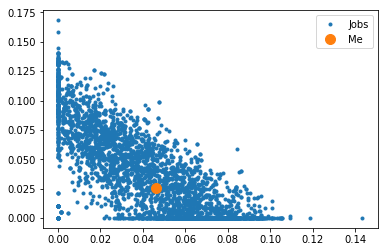

In [14]:
plt.figure()
plt.plot(*w.T,'.', label="Jobs")
plt.plot(pt_resume[0][0],pt_resume[0][1],".", label="Me", markersize=20)
plt.legend()

In [15]:
test_examples = pickle.load(open( "Test_examples", "rb" ))

pt_test = nmf.transform(tfidf.transform(cv.transform(test_examples['Job_description'])))

In [16]:
pt_test

array([[ 0.02900905,  0.07444844],
       [ 0.05650348,  0.07136534],
       [ 0.01731556,  0.07067642]])

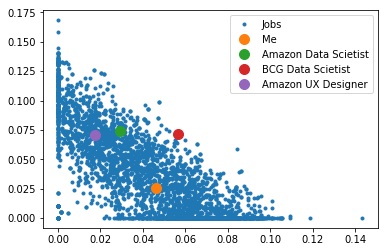

In [17]:
plt.figure()
plt.plot(*w.T,'.', label="Jobs")
plt.plot(pt_resume[0][0],pt_resume[0][1],".", label="Me", markersize=20)
plt.plot(pt_test[0][0],pt_test[0][1],".", label="Amazon Data Scietist", markersize=20)
plt.plot(pt_test[1][0],pt_test[1][1],".", label="BCG Data Scietist", markersize=20)
plt.plot(pt_test[2][0],pt_test[2][1],".", label="Amazon UX Designer", markersize=20)
plt.legend()

## NMF - Resume Compare in 15 dimensions

Now feeding in my resume to find most and least similar

In [120]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [159]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(cv.transform(job_descriptions))

In [123]:
from sklearn.decomposition.nmf import NMF
nmf = NMF(n_components = 15, max_iter=500)

In [124]:
X_nmf = nmf.fit_transform(X_tfidf)
# h = nmf.components_
# w.dot(h).shape

In [161]:
# feature_names = tfidf.get_feature_names()

# for topic_idx, topic in enumerate(X_nmf.components_):
#     print("Topic #%d:" % topic_idx)
#     print(" ".join([feature_names[i]
#                     for i in topic.argsort()[:-n_top_words - 1:-1]]))
#     print()
    
    
for topic_idx, topic in enumerate(nmf.components_):
    print(f"TOPIC {topic_idx}")
    for j in topic.argsort()[:-10 - 1:-1]:
        print(np.array(cv.get_feature_names())[j])
    print()

TOPIC 0
product
team
business
sales
customer
marketing
work
company
new
customers

TOPIC 1
learning
machine learning
machine
data
algorithms
research
deep
science
experience
models

TOPIC 2
data
business
analysis
experience
analytics
analyst
sql
data analyst
tools
statistical

TOPIC 3
today
apply today
compass
kelly
compass group
snowflake
mobile
nvidia
real time
time

TOPIC 4
eligibility
cybercoders
law
work
applicants
form hire
law persons
verification document
document form
states complete

TOPIC 5
laboratory
clinical
required
research
ability
work
experience
equipment
support
procedures

TOPIC 6
software
experience
development
systems
design
engineering
software development
engineer
test
code

TOPIC 7
google
usa
resumes
engineers
accept
wa usa
scale
google engineers
search
regardless

TOPIC 8
xilinx
fpga
acceleration
adaptable intelligent
adaptive
compute
adaptable
intelligent
industry
processor

TOPIC 9
digital transformation
table
iot
iot applications
transformation
digital
platf

In [125]:
df_resume = pd.read_csv('resume.txt', sep='^', dtype=str, header=None)

string_resume = ""
for i in df_resume[0]:
    string_resume = string_resume + i + ' '
    
list_resume=[]
list_resume.append(string_resume)
    
pt_resume = nmf.transform(tfidf.transform(cv.transform(list_resume)))
pt_resume[0]

array([  3.73917027e-02,   8.17122399e-04,   8.05168344e-02,
         2.13823776e-05,   2.40166577e-04,   0.00000000e+00,
         0.00000000e+00,   1.47156310e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.97041893e-03,   0.00000000e+00,   0.00000000e+00])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
def cosine_sim(X_nmf, pt_resume):
    similarities = []
    for job in X_nmf:
        cs = cosine_similarity(job.reshape(-1,1).T, pt_resume.reshape(-1,1).T)
        similarities.append(cs[0][0])
    return similarities

In [128]:
similarities_to_my_resume = cosine_sim(X_nmf,pt_resume)

In [129]:
df_similarities = pd.DataFrame()
df_similarities['similarities'] = similarities_to_my_resume
df_similarities['job_descriptions'] = job_descriptions

In [229]:
df_similarities.tail()

,similarities,job_descriptions
3447,0.002451,5 years of experience\nworking with Oracle EBS...
3448,0.012573,"Genesis10, www.genesis10.com, is seeking a Dat..."
3449,0.013976,Sundial Software is currently recruiting for a...
3450,0.006215,About the Role:\n\nThis Entry Level Business A...
3451,0.098367,"Nationally recognized Bellevue, WA job with a ..."


In [231]:
df.tail(20)

,Rating,Job_title,Company,Location,Salary_range,Status,Job_description,Job_description_bullets,Company_info,Link,Other
3444,4.9,Ad Operations Analyst,Liftoff,"Palo Alto, CA",$55k-$82k(Glassdoor Est.),New,Liftoff is a rapidly growing mobile marketing ...,Serve as an internal POC for key clients - man...,"Overview\nHeadquartersPalo Alto, CA\nSize51 to...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3445,4.3,Business Analyst,22nd Century Staffing,"Lansing, MI",,Today,"Title: Business Analyst\nLocation: Lansing, MI...","Reviews, analyzes, and evaluates business syst...","Overview\nHeadquartersMcLean, VA\nSize51 to 20...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3446,4.4,QC Chemistry Analyst,The Fountain Group,"Northborough, MA",,Today,"Job Description\nHello,\n\nMy name is Julianne...",-,"Overview\nHeadquartersTampa, FL\nSize1001 to 5...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3447,3.4,EDM Business Analyst,National Oilwell Varco,"Houston, TX",$58k-$95k(Glassdoor Est.),Today,5 years of experience\nworking with Oracle EBS...,-,"Overview\nHeadquartersHouston, TX\nSize10000+ ...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3448,4.1,Database Analyst,Genesis10,"Minneapolis, MN",,Today,"Genesis10, www.genesis10.com, is seeking a Dat...",-,"Overview\nHeadquartersNew York, NY\nSize1001 t...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3449,1.7,Data Governance and Management Analyst,Sundial Software,"Madison, WI",,Today,Sundial Software is currently recruiting for a...,"decision making authority,\ncompliance monitor...","Overview\nHeadquartersMadison, WI\nSize1 to 50...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3450,4.9,Business Analyst - Entry Level,"Staffigo Technical Services, LLC","Sandy Springs, Fulton, GA",,Today,About the Role:\n\nThis Entry Level Business A...,Work as part of project teams implementing bus...,"Overview\nHeadquartersWoodridge, IL\nSize51 to...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3451,4.3,Business Analyst,CVPartners Inc,"Bellevue, WA",,Today,"Nationally recognized Bellevue, WA job with a ...",-,"Overview\nHeadquartersSan Francisco, CA\nSize1...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3452,3.5,Healthcare Data Analyst - PSHMG PRG PLN/MGT RP...,Penn State Health,"Hershey, PA",$47k-$63k(Glassdoor Est.),Today,**Penn State Health Milton S\. Hershey Medical...,-,"Overview\nHeadquartersHershey, PA\nSize5001 to...",https://www.glassdoor.com/partner/jobListing.h...,NaN
3453,3.4,Product Analyst (careC2),Leidos,"Reston, VA",$53k-$89k(Glassdoor Est.),We're Hiring,"Job Description:\ncareC2™, a Leidos Health Pro...",reduces variation and potential issues as it f...,"Overview\nHeadquartersReston, VA\nSize10000+ E...",https://www.glassdoor.com/partner/jobListing.h...,NaN


In [150]:
top_matches = df_similarities.sort_values('similarities', ascending=False).head(3)
top_matches

,similarities,job_descriptions
3392,0.987740,Genesis10 is seeking a NOC Data Engineer II fo...
3127,0.986054,Overview\nThe Data Analyst II is responsible f...
3191,0.985334,Bird is a last-mile electric vehicle sharing c...


In [151]:
df.iloc[3392]

Rating                                                                   2.6
Job_title                            Senior Data Analyst - MileOne Autogroup
Company                                                   MileOne Automotive
Location                                                          Towson, MD
Salary_range                                       $55k-$70k(Glassdoor Est.)
Status                                                                 Today
Job_description            MileOne Autogroup is seeking a seasoned senior...
Job_description_bullets    Serve as the subject matter expert in working ...
Company_info               Overview\nHeadquartersTowson, MD\nSize1001 to ...
Link                       https://www.glassdoor.com/partner/jobListing.h...
Other                                                                    NaN
Name: 3404, dtype: object

In [132]:
top_matches['job_descriptions'].iloc[0]

'Genesis10 is seeking a NOC Data Engineer II for a leading Telecommunications company. This is a direct hire role and the location can be in Daleville, VA (preferred), Waynesboro, VA or Columbia, SC. Candidates applying must be able to perform routing, switching and configurations. Qualified candidates will have Telecom/ISP industry experience. Relocation assistance available.\n\nJob Summary:\nThis position provides in depth support of the Client\'s Transport, IP and Ethernet Networks providing routing, switching, and configuration expertise. The Engineer will have extensive knowledge of commonly used concepts, practices, and procedures within data engineering. The Position may operate with considerable latitude for unsupervised action or decision. May design, develop, test and implement all components, equipment, and software within the functional area of the organization. The position may perform administrative work relating to projects and assignments.\n\nJob Description: Provide te

In [131]:
bottom_matches = df_similarities.sort_values('similarities', ascending=True).head(3)
bottom_matches

,similarities,job_descriptions
2011,0.0,"Description:\n\nFort Worth - TX, TX4600A, 4600..."
1030,0.0,Job Description\nAmazon is looking for a passi...
1059,0.0,Job Description\nAmazon is looking for a passi...


In [133]:
bottom_matches['job_descriptions'].iloc[0]

"Description:\n\nFort Worth - TX, TX4600A, 4600 Alliance Gateway Freeway, 76177\nAllison Carroll\n0816-42789\n\nWe believe that, when done right, investing liberates people to create their own destiny. We are driven by our purpose to champion every client’s goals with passion and integrity. We respect and appreciate the diversity of our employees, our clients, and the communities we serve. We challenge conventions strategically to create value for our clients, our firm and the world. We live and bring to life the concept of ‘own your tomorrow’ every day. We champion our employee strengths, guide their development, and invest in their long-term success. We hire optimistic, results-oriented, curious, innovative, and adaptable people with the desire to help our clients and one another succeed.\n\nAs a company, we were established by Chuck over 40 years ago to champion Main Street over Wall Street, and to help Americans transform themselves from earners to owners. Through advocacy and inno

In [134]:
pt_test = nmf.transform(tfidf.transform(cv.transform(test_examples['Job_description'])))

In [135]:
# similarity to amazon data scientist
cosine_similarity(pt_test[0].reshape(-1,1).T, pt_resume.reshape(-1,1).T)

array([[ 0.66528308]])

In [136]:
# similarity to BCG data scientist
cosine_similarity(pt_test[1].reshape(-1,1).T, pt_resume.reshape(-1,1).T)

array([[ 0.70011928]])

In [138]:
# similarity to Amazon UX designer
cosine_similarity(pt_test[2].reshape(-1,1).T, pt_resume.reshape(-1,1).T)

array([[ 0.25601569]])

In [141]:
df_chef = pd.read_csv('Sous_chef.txt', sep='^', dtype=str, header=None)
string_chef = df_chef.iloc[0,0]
list_chef=[]
list_chef.append(string_chef)
pt_chef = nmf.transform(tfidf.transform(cv.transform(list_chef)))

In [142]:
cosine_similarity(pt_chef.reshape(-1,1).T, pt_resume.reshape(-1,1).T)

array([[ 0.17572799]])

In [335]:
test_examples

,Rating,Job_title,Company,Location,Salary_range,Status,Job_description,Company_info
0,3.8,Data Scientist,Amazon,"Seattle, WA",$129k-$182k(Glassdoor Est.),12 days ago,Job Description\nAs David Hilbert said “The ar...,"Overview\nHeadquartersSeattle, WA\nSize10000+ ..."
0,4.3,Data Scientist,Boston Consulting Group,"Seattle, WA",$130k-$187k(Glassdoor Est.),6 days ago,Data Scientist\n\n30-Oct-2018\n\nPosition Summ...,"Overview\nHeadquartersBoston, MA\nSizeUnknown\..."
0,3.8,UX Designer,Amazon,"Seattle, WA",$101k-$132k(Glassdoor Est.),4 days ago,Job Description\nWe make Amazon more personal ...,"Overview\nHeadquartersSeattle, WA\nSize10000+ ..."


In [137]:
test_examples["Job_description"].iloc[1]

"Data Scientist\n\n30-Oct-2018\n\nPosition Summary\nWe are seeking the experienced and passionate candidate who will be the next member of our team in Seattle, WA. Demonstrating and communicating a passion for building the data foundation, products and capabilities that drive business growth, the Expert Data Scientist will work at the forefront of technology and business via our MSP Catalyst product suites.\n\nCatalyst is the E2E / enterprise grade, cloud-based, Big Data analytics platform that hosts all the Marketing, Sales and Pricing applications developed and commercialized by BCG. These products are critical to our growth plan, scalability, and to the success of our project teams. BCG has made multimillion-dollar investments to create Flagship products that complement our consulting offerings.\n\nJob ID\n5621BR\n\nCompany Information\nThe Boston Consulting Group (BCG) is a global management consulting firm and the world’s leading advisor on business strategy. We partner with clien

In [21]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(test_desc))

['Spectro Scientific is seeking a Data Scientist with a background in creating machine learning algorithms.', 'The successful candidate will have strong algorithm development experience, which may come from experience in such diverse areas as physics, data science, or computer science.', 'The candidate will work to enhance the Spectro Scientific’s TruVu platform and related rules engines with data-driven diagnostic and prognostic tools.', 'Are you looking for a challenge?', 'How about changing an entire industry with your input?', 'Spectro Scientific’s TruVu platform is changing the fluids analysis industry.', 'We are looking for a data scientist who knows various approaches to solving stochastic problems.', 'Further, knowing how large information databases and related algorithms can be put to use to enhance the quality of your predictions will be key.', 'You will not come onboard alone – Spectro’s existing fluidics rules engines have for years provided our customers with information-r

In [22]:
from nltk.util import ngrams
my_words = word_tokenize(test_desc) # This is the list of all words
twograms = list(ngrams(my_words,2)) # This is for two-word combos, but can pick any n
print(twograms)

[('Spectro', 'Scientific'), ('Scientific', 'is'), ('is', 'seeking'), ('seeking', 'a'), ('a', 'Data'), ('Data', 'Scientist'), ('Scientist', 'with'), ('with', 'a'), ('a', 'background'), ('background', 'in'), ('in', 'creating'), ('creating', 'machine'), ('machine', 'learning'), ('learning', 'algorithms'), ('algorithms', '.'), ('.', 'The'), ('The', 'successful'), ('successful', 'candidate'), ('candidate', 'will'), ('will', 'have'), ('have', 'strong'), ('strong', 'algorithm'), ('algorithm', 'development'), ('development', 'experience'), ('experience', ','), (',', 'which'), ('which', 'may'), ('may', 'come'), ('come', 'from'), ('from', 'experience'), ('experience', 'in'), ('in', 'such'), ('such', 'diverse'), ('diverse', 'areas'), ('areas', 'as'), ('as', 'physics'), ('physics', ','), (',', 'data'), ('data', 'science'), ('science', ','), (',', 'or'), ('or', 'computer'), ('computer', 'science'), ('science', '.'), ('.', 'The'), ('The', 'candidate'), ('candidate', 'will'), ('will', 'work'), ('work

In [ ]:
from nltk.tokenize import RegexpTokenizer

# RegexpTokenizer with whitespace delimiter
whitespace_tokenizer = RegexpTokenizer("\s+", gaps=True)
print(whitespace_tokenizer.tokenize(my_text))

cap_tokenizer = RegexpTokenizer("[A-Z]['\w]+")
print(cap_tokenizer.tokenize(my_text))

In [ ]:
import re # Regular expression library
import string

# Replace punctuations with a white space
clean_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', test_desc)
clean_text = clean_text.lower()
clean_text

In [26]:
import re # Regular expression library
import string

# Replace punctuations with a white space
clean_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', test_desc)
clean_text = clean_text.lower()
clean_text


'spectro scientific is seeking a data scientist with a background in creating machine learning algorithms  the successful candidate will have strong algorithm development experience  which may come from experience in such diverse areas as physics  data science  or computer science  the candidate will work to enhance the spectro scientific’s truvu platform and related rules engines with data driven diagnostic and prognostic tools \nare you looking for a challenge  how about changing an entire industry with your input  spectro scientific’s truvu platform is changing the fluids analysis industry  we are looking for a data scientist who knows various approaches to solving stochastic problems  further  knowing how large information databases and related algorithms can be put to use to enhance the quality of your predictions will be key  you will not come onboard alone – spectro’s existing fluidics rules engines have for years provided our customers with information rich guidance  and you wi

In [58]:
clean_text_l=[]
clean_text_l.append(clean_text)
print(clean_text_l)

['spectro scientific is seeking a data scientist with a background in creating machine learning algorithms  the successful candidate will have strong algorithm development experience  which may come from experience in such diverse areas as physics  data science  or computer science  the candidate will work to enhance the spectro scientific’s truvu platform and related rules engines with data driven diagnostic and prognostic tools \nare you looking for a challenge  how about changing an entire industry with your input  spectro scientific’s truvu platform is changing the fluids analysis industry  we are looking for a data scientist who knows various approaches to solving stochastic problems  further  knowing how large information databases and related algorithms can be put to use to enhance the quality of your predictions will be key  you will not come onboard alone – spectro’s existing fluidics rules engines have for years provided our customers with information rich guidance  and you w

In [28]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(clean_text_l)
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,algorithm,algorithmic,algorithms,analysis,analyze,applications,approaches,areas,artificial,available,...,validation,variety,various,visit,warehouse,work,working,world,www,years
0,1,1,2,2,1,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [ ]:
WordNetLemmatizer

In [70]:
from nltk.tokenize import MWETokenizer # multi-word expression

mwe_tokenizer = MWETokenizer([
    ('machine', 'learning'),
    ('computer', 'science'),
    ('deep', 'learning'),
    ('software', 'development'),
    ('neural', 'networks'),
    ('project', 'management'),
    ('product', 'management'),
    ('software', 'engineering'),
    ('data', 'engineering'),
    ('database', 'administration'),
])

mwe_tokens = mwe_tokenizer.tokenize(word_tokenize(clean_text))

mwe_tokens

['spectro',
 'scientific',
 'is',
 'seeking',
 'a',
 'data',
 'scientist',
 'with',
 'a',
 'background',
 'in',
 'creating',
 'machine_learning',
 'algorithms',
 'the',
 'successful',
 'candidate',
 'will',
 'have',
 'strong',
 'algorithm',
 'development',
 'experience',
 'which',
 'may',
 'come',
 'from',
 'experience',
 'in',
 'such',
 'diverse',
 'areas',
 'as',
 'physics',
 'data',
 'science',
 'or',
 'computer_science',
 'the',
 'candidate',
 'will',
 'work',
 'to',
 'enhance',
 'the',
 'spectro',
 'scientific',
 '’',
 's',
 'truvu',
 'platform',
 'and',
 'related',
 'rules',
 'engines',
 'with',
 'data',
 'driven',
 'diagnostic',
 'and',
 'prognostic',
 'tools',
 'are',
 'you',
 'looking',
 'for',
 'a',
 'challenge',
 'how',
 'about',
 'changing',
 'an',
 'entire',
 'industry',
 'with',
 'your',
 'input',
 'spectro',
 'scientific',
 '’',
 's',
 'truvu',
 'platform',
 'is',
 'changing',
 'the',
 'fluids',
 'analysis',
 'industry',
 'we',
 'are',
 'looking',
 'for',
 'a',
 'data',


In [66]:
from nltk import word_tokenize, pos_tag, ne_chunk
 
sentence = "Mark and John are working at Google in the United States on machine learning."
 
print(ne_chunk(pos_tag(word_tokenize(sentence))))
 

(S
  (PERSON Mark/NNP)
  and/CC
  (PERSON John/NNP)
  are/VBP
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP)
  in/IN
  the/DT
  (GPE United/NNP States/NNPS)
  on/IN
  machine/NN
  learning/NN
  ./.)


# Now we try LDA

In [8]:
from __future__ import print_function

In [173]:
# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [174]:
cv.fit(job_descriptions)
# Create the term-document matrix
# Transpose it so the terms are the rows
counts = cv.transform(job_descriptions).transpose()

#### Convert to gensim
We need to convert our sparse `scipy` matrix to a `gensim`-friendly object called a Corpus. This is also essential for term-document matrices that are larger than local memory.

In [175]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

#### Map matrix rows to words (tokens)
We need to save a mapping (dict) of row id to word (token) for later use by gensim:

In [176]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [177]:
len(id2word)

11127

At this point, we can create an LDA model. It requires our corpus of word counts, mapping of row ids to words, and our selection of `num_topics`.

In [191]:
type(lda)

gensim.models.ldamodel.LdaModel

Let's take a look at what happened.  Here are the 5 most important words for each topic we found:

In [161]:
lda.print_topics() # 3 topics, 1 ngrams

2018-11-13 13:01:45,835 : INFO : topic #0 (0.333): 0.004*"national" + 0.004*"data" + 0.004*"status" + 0.004*"experience" + 0.004*"race" + 0.004*"disability" + 0.004*"opportunity" + 0.004*"origin" + 0.004*"religion" + 0.004*"equal"
2018-11-13 13:01:45,836 : INFO : topic #1 (0.333): 0.005*"data" + 0.005*"experience" + 0.005*"work" + 0.004*"team" + 0.004*"science" + 0.004*"skills" + 0.004*"machine" + 0.004*"python" + 0.004*"learning" + 0.004*"scientist"
2018-11-13 13:01:45,837 : INFO : topic #2 (0.333): 0.005*"data" + 0.005*"experience" + 0.004*"business" + 0.004*"work" + 0.004*"team" + 0.004*"science" + 0.004*"years" + 0.004*"skills" + 0.004*"python" + 0.004*"analysis"


[(0,
  '0.004*"national" + 0.004*"data" + 0.004*"status" + 0.004*"experience" + 0.004*"race" + 0.004*"disability" + 0.004*"opportunity" + 0.004*"origin" + 0.004*"religion" + 0.004*"equal"'),
 (1,
  '0.005*"data" + 0.005*"experience" + 0.005*"work" + 0.004*"team" + 0.004*"science" + 0.004*"skills" + 0.004*"machine" + 0.004*"python" + 0.004*"learning" + 0.004*"scientist"'),
 (2,
  '0.005*"data" + 0.005*"experience" + 0.004*"business" + 0.004*"work" + 0.004*"team" + 0.004*"science" + 0.004*"years" + 0.004*"skills" + 0.004*"python" + 0.004*"analysis"')]

In [159]:
# lda.print_topics() # 5 topics, 1 ngrams

2018-11-13 12:59:36,996 : INFO : topic #0 (0.200): 0.004*"national" + 0.004*"race" + 0.004*"religion" + 0.004*"origin" + 0.004*"color" + 0.004*"equal" + 0.004*"disability" + 0.004*"status" + 0.004*"employment" + 0.004*"veteran"
2018-11-13 12:59:36,998 : INFO : topic #1 (0.200): 0.004*"work" + 0.004*"data" + 0.004*"experience" + 0.004*"team" + 0.004*"science" + 0.004*"learning" + 0.004*"skills" + 0.003*"scientist" + 0.003*"company" + 0.003*"statistics"
2018-11-13 12:59:36,998 : INFO : topic #2 (0.200): 0.005*"data" + 0.005*"experience" + 0.005*"skills" + 0.004*"business" + 0.004*"work" + 0.004*"ability" + 0.004*"analysis" + 0.004*"python" + 0.004*"science" + 0.004*"statistical"
2018-11-13 12:59:36,999 : INFO : topic #3 (0.200): 0.006*"data" + 0.005*"experience" + 0.005*"learning" + 0.005*"team" + 0.005*"python" + 0.005*"machine" + 0.004*"work" + 0.004*"science" + 0.004*"scientist" + 0.004*"years"
2018-11-13 12:59:37,000 : INFO : topic #4 (0.200): 0.004*"experience" + 0.004*"data" + 0.00

[(0,
  '0.004*"national" + 0.004*"race" + 0.004*"religion" + 0.004*"origin" + 0.004*"color" + 0.004*"equal" + 0.004*"disability" + 0.004*"status" + 0.004*"employment" + 0.004*"veteran"'),
 (1,
  '0.004*"work" + 0.004*"data" + 0.004*"experience" + 0.004*"team" + 0.004*"science" + 0.004*"learning" + 0.004*"skills" + 0.003*"scientist" + 0.003*"company" + 0.003*"statistics"'),
 (2,
  '0.005*"data" + 0.005*"experience" + 0.005*"skills" + 0.004*"business" + 0.004*"work" + 0.004*"ability" + 0.004*"analysis" + 0.004*"python" + 0.004*"science" + 0.004*"statistical"'),
 (3,
  '0.006*"data" + 0.005*"experience" + 0.005*"learning" + 0.005*"team" + 0.005*"python" + 0.005*"machine" + 0.004*"work" + 0.004*"science" + 0.004*"scientist" + 0.004*"years"'),
 (4,
  '0.004*"experience" + 0.004*"data" + 0.004*"years" + 0.004*"work" + 0.004*"development" + 0.003*"skills" + 0.003*"business" + 0.003*"team" + 0.003*"responsibilities" + 0.003*"understanding"')]

In [163]:
lda.print_topics() # 10 topics, 1 ngrams

2018-11-13 13:03:12,061 : INFO : topic #0 (0.100): 0.004*"data" + 0.004*"science" + 0.004*"experience" + 0.004*"team" + 0.004*"work" + 0.004*"learning" + 0.003*"python" + 0.003*"business" + 0.003*"new" + 0.003*"machine"
2018-11-13 13:03:12,062 : INFO : topic #1 (0.100): 0.005*"data" + 0.005*"experience" + 0.004*"business" + 0.004*"skills" + 0.004*"scientist" + 0.004*"analytics" + 0.004*"years" + 0.004*"team" + 0.004*"science" + 0.004*"learning"
2018-11-13 13:03:12,063 : INFO : topic #2 (0.100): 0.005*"experience" + 0.005*"data" + 0.005*"ability" + 0.005*"product" + 0.004*"looking" + 0.004*"analysis" + 0.004*"understand" + 0.004*"engineering" + 0.004*"science" + 0.004*"experiments"
2018-11-13 13:03:12,064 : INFO : topic #3 (0.100): 0.004*"data" + 0.004*"analysis" + 0.003*"experience" + 0.003*"ability" + 0.003*"work" + 0.003*"years" + 0.003*"team" + 0.003*"new" + 0.003*"include" + 0.003*"responsibilities"
2018-11-13 13:03:12,065 : INFO : topic #4 (0.100): 0.004*"experience" + 0.004*"data

[(0,
  '0.004*"data" + 0.004*"science" + 0.004*"experience" + 0.004*"team" + 0.004*"work" + 0.004*"learning" + 0.003*"python" + 0.003*"business" + 0.003*"new" + 0.003*"machine"'),
 (1,
  '0.005*"data" + 0.005*"experience" + 0.004*"business" + 0.004*"skills" + 0.004*"scientist" + 0.004*"analytics" + 0.004*"years" + 0.004*"team" + 0.004*"science" + 0.004*"learning"'),
 (2,
  '0.005*"experience" + 0.005*"data" + 0.005*"ability" + 0.005*"product" + 0.004*"looking" + 0.004*"analysis" + 0.004*"understand" + 0.004*"engineering" + 0.004*"science" + 0.004*"experiments"'),
 (3,
  '0.004*"data" + 0.004*"analysis" + 0.003*"experience" + 0.003*"ability" + 0.003*"work" + 0.003*"years" + 0.003*"team" + 0.003*"new" + 0.003*"include" + 0.003*"responsibilities"'),
 (4,
  '0.004*"experience" + 0.004*"data" + 0.003*"work" + 0.003*"employment" + 0.003*"python" + 0.003*"related" + 0.003*"analysis" + 0.003*"science" + 0.003*"job" + 0.003*"applicants"'),
 (5,
  '0.006*"data" + 0.005*"experience" + 0.005*"work

In [179]:
lda.print_topics() # 10 topics, 2 ngrams

2018-11-13 13:06:28,781 : INFO : topic #0 (0.100): 0.004*"experience" + 0.004*"data" + 0.003*"scientist" + 0.003*"data scientist" + 0.003*"machine learning" + 0.003*"machine" + 0.003*"learning" + 0.003*"job" + 0.003*"work" + 0.003*"python"
2018-11-13 13:06:28,783 : INFO : topic #1 (0.100): 0.003*"data" + 0.003*"experience" + 0.003*"team" + 0.003*"science" + 0.003*"new" + 0.003*"work" + 0.003*"business" + 0.003*"learning" + 0.003*"models" + 0.003*"scientist"
2018-11-13 13:06:28,784 : INFO : topic #2 (0.100): 0.004*"data" + 0.003*"experience" + 0.003*"work" + 0.003*"learning" + 0.003*"data scientist" + 0.003*"scientist" + 0.003*"science" + 0.003*"python" + 0.003*"skills" + 0.003*"business"
2018-11-13 13:06:28,786 : INFO : topic #3 (0.100): 0.003*"data" + 0.003*"experience" + 0.003*"work" + 0.002*"science" + 0.002*"team" + 0.002*"skills" + 0.002*"python" + 0.002*"years" + 0.002*"analysis" + 0.002*"ability"
2018-11-13 13:06:28,787 : INFO : topic #4 (0.100): 0.003*"data" + 0.003*"experience

[(0,
  '0.004*"experience" + 0.004*"data" + 0.003*"scientist" + 0.003*"data scientist" + 0.003*"machine learning" + 0.003*"machine" + 0.003*"learning" + 0.003*"job" + 0.003*"work" + 0.003*"python"'),
 (1,
  '0.003*"data" + 0.003*"experience" + 0.003*"team" + 0.003*"science" + 0.003*"new" + 0.003*"work" + 0.003*"business" + 0.003*"learning" + 0.003*"models" + 0.003*"scientist"'),
 (2,
  '0.004*"data" + 0.003*"experience" + 0.003*"work" + 0.003*"learning" + 0.003*"data scientist" + 0.003*"scientist" + 0.003*"science" + 0.003*"python" + 0.003*"skills" + 0.003*"business"'),
 (3,
  '0.003*"data" + 0.003*"experience" + 0.003*"work" + 0.002*"science" + 0.002*"team" + 0.002*"skills" + 0.002*"python" + 0.002*"years" + 0.002*"analysis" + 0.002*"ability"'),
 (4,
  '0.003*"data" + 0.003*"experience" + 0.002*"science" + 0.002*"learning" + 0.002*"skills" + 0.002*"machine" + 0.002*"machine learning" + 0.002*"work" + 0.002*"python" + 0.002*"business"'),
 (5,
  '0.003*"data" + 0.003*"analysis" + 0.003*

In [203]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(alpha='auto', corpus=corpus, num_topics=10, minimum_probability=0.03, id2word=id2word, passes=10, eta = 0.001)

2018-11-13 13:33:42,245 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2018-11-13 13:33:42,247 : INFO : using serial LDA version on this node
2018-11-13 13:33:42,258 : INFO : running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 864 documents, updating model once every 864 documents, evaluating perplexity every 864 documents, iterating 50x with a convergence threshold of 0.001000
2018-11-13 13:33:44,895 : INFO : -12.205 per-word bound, 4721.5 perplexity estimate based on a held-out corpus of 864 documents with 266881 words
2018-11-13 13:33:44,896 : INFO : PROGRESS: pass 0, at document #864/864
2018-11-13 13:33:45,821 : INFO : optimized alpha [0.18760604, 0.17225592, 0.18321985, 0.17945519, 0.18426305, 0.1814042, 0.18447064, 0.17309329, 0.17600399, 0.16562086]
2018-11-13 13:33:45,832 : INFO : topic #9 (0.166): 0.003*"team" + 0.003*"skills" + 0.003*"science" + 0.003*"working" + 0.003*"experience" + 0.0

2018-11-13 13:33:59,714 : INFO : topic #0 (0.150): 0.004*"data" + 0.003*"experience" + 0.003*"python" + 0.003*"work" + 0.003*"team" + 0.003*"business" + 0.003*"science" + 0.003*"skills" + 0.003*"analysis" + 0.003*"years"
2018-11-13 13:33:59,715 : INFO : topic diff=inf, rho=0.408248
2018-11-13 13:34:02,274 : INFO : -10.047 per-word bound, 1057.7 perplexity estimate based on a held-out corpus of 864 documents with 266881 words
2018-11-13 13:34:02,274 : INFO : PROGRESS: pass 5, at document #864/864
2018-11-13 13:34:03,009 : INFO : optimized alpha [0.14168856, 0.048733663, 0.10845286, 0.060220808, 0.099178433, 0.071056016, 0.11326329, 0.044590466, 0.044797637, 0.041566994]
2018-11-13 13:34:03,024 : INFO : topic #9 (0.042): 0.003*"skills" + 0.003*"team" + 0.003*"development" + 0.002*"experience" + 0.002*"python" + 0.002*"data" + 0.002*"years" + 0.002*"analysis" + 0.002*"opportunity" + 0.002*"ability"
2018-11-13 13:34:03,025 : INFO : topic #7 (0.045): 0.003*"work" + 0.003*"data" + 0.003*"exp

2018-11-13 13:34:17,858 : INFO : topic diff=inf, rho=0.301511


In [198]:
lda.eta

array([ 0.50894791,  0.30484518,  0.3135291 , ...,  0.40335864,
        0.26946664,  0.36234537], dtype=float32)

In [204]:
lda.print_topics() # 10 topics, 2 ngrams

2018-11-13 13:34:17,876 : INFO : topic #0 (0.126): 0.003*"data" + 0.003*"experience" + 0.003*"python" + 0.003*"work" + 0.003*"business" + 0.003*"team" + 0.003*"skills" + 0.003*"science" + 0.003*"analysis" + 0.003*"scientist"
2018-11-13 13:34:17,877 : INFO : topic #1 (0.040): 0.004*"data" + 0.004*"experience" + 0.004*"years" + 0.003*"skills" + 0.003*"work" + 0.003*"ability" + 0.003*"scientist" + 0.003*"degree" + 0.003*"communication" + 0.003*"responsibilities"
2018-11-13 13:34:17,878 : INFO : topic #2 (0.093): 0.003*"disability" + 0.003*"race" + 0.003*"religion" + 0.003*"origin" + 0.003*"national" + 0.003*"national origin" + 0.003*"color" + 0.003*"status" + 0.003*"veteran" + 0.003*"equal"
2018-11-13 13:34:17,880 : INFO : topic #3 (0.046): 0.004*"data" + 0.004*"experience" + 0.003*"work" + 0.003*"learning" + 0.003*"machine" + 0.003*"machine learning" + 0.003*"team" + 0.003*"scientist" + 0.003*"years" + 0.003*"data scientist"
2018-11-13 13:34:17,880 : INFO : topic #4 (0.082): 0.003*"data"

[(0,
  '0.003*"data" + 0.003*"experience" + 0.003*"python" + 0.003*"work" + 0.003*"business" + 0.003*"team" + 0.003*"skills" + 0.003*"science" + 0.003*"analysis" + 0.003*"scientist"'),
 (1,
  '0.004*"data" + 0.004*"experience" + 0.004*"years" + 0.003*"skills" + 0.003*"work" + 0.003*"ability" + 0.003*"scientist" + 0.003*"degree" + 0.003*"communication" + 0.003*"responsibilities"'),
 (2,
  '0.003*"disability" + 0.003*"race" + 0.003*"religion" + 0.003*"origin" + 0.003*"national" + 0.003*"national origin" + 0.003*"color" + 0.003*"status" + 0.003*"veteran" + 0.003*"equal"'),
 (3,
  '0.004*"data" + 0.004*"experience" + 0.003*"work" + 0.003*"learning" + 0.003*"machine" + 0.003*"machine learning" + 0.003*"team" + 0.003*"scientist" + 0.003*"years" + 0.003*"data scientist"'),
 (4,
  '0.003*"data" + 0.003*"experience" + 0.002*"business" + 0.002*"work" + 0.002*"python" + 0.002*"science" + 0.002*"skills" + 0.002*"team" + 0.002*"analytics" + 0.002*"time"'),
 (5,
  '0.003*"data" + 0.003*"experience" 

These are all very similar topics...

### Topic Space
If we want to map our documents to the topic space we need to actually use the LdaModel transformer that we created above, like so:

In [180]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [181]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

Now we can take a look at the document vectors in the topic space, which are measures of the component of each document along each topic.  Thus, at most a document vector can have num_topics=3 nonzero components in the topic space, and most have far fewer.

In [182]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[:5]

[[(0, 0.65589267), (7, 0.33963692)],
 [(1, 0.27860165), (2, 0.10319155), (5, 0.61610413)],
 [(1, 0.66787702), (3, 0.25903639), (7, 0.071130775)],
 [(1, 0.8098048), (3, 0.045381062), (6, 0.10736494), (7, 0.036103625)],
 [(1, 0.071023211), (3, 0.50963038), (7, 0.41091055)]]

In [183]:
job_descriptions[0:5]

0    Spectro Scientific is seeking a Data Scientist...
1    Steady helps users make more money - we allow ...
2    Work that matters, fueled by passion for pets!...
3    The Role:\n\nData Scientists at Grand Rounds w...
4    The Company:\n\nWe're a tech company that's ch...
Name: Job_description, dtype: object

In [184]:
# we can quantify the 'fit' of our model, to compare with other corpora, etc.
lda.log_perplexity(corpus)

2018-11-13 13:07:58,980 : INFO : -8.582 per-word bound, 383.2 perplexity estimate based on a held-out corpus of 864 documents with 266881 words


-8.5820042324580665

Lower perplexity is better, but the practical utility of LDA is the final word in how happy we are with our model:
>Is it intuitively associating my documents with my themes?

>Is it helping me cluster similar documents together?

In [47]:
key_cols = [col for col in X_cv.columns if 'python' in col]
print(key_cols)

['algorithms python', 'analysis python', 'applications python', 'bash python', 'choice python', 'code python', 'coding python', 'data python', 'developing python', 'development python', 'dice python', 'especially python', 'experience python', 'expert python', 'expertise python', 'familiar python', 'familiarity python', 'fluency python', 'fluent python', 'following python', 'frameworks python', 'including python', 'ipython', 'ipython information', 'java python', 'javascript python', 'js python', 'knowledge python', 'language python', 'languages python', 'learning python', 'like python', 'limited python', 'matlab ipython', 'matlab python', 'models python', 'mssql python', 'objective python', 'perl python', 'php python', 'platform python', 'preferably python', 'preferred python', 'processing python', 'proficiency python', 'proficient python', 'programming python', 'python', 'python ability', 'python able', 'python azure', 'python basic', 'python big', 'python built', 'python data', 'pytho